Дана функция **f(x) = 5x^2 + 10x - 30**
---
1. Определить корни (найти такие х при которых f(x) = 0)

2. Найти интервалы, на которых функция возрастает (f'(x) > 0)

3. Найти интервалы, на которых функция убывает (f'(x) < 0)

4. Построить график

5. Вычислить вершину (Такие х где f'(x) = 0)

6. Определить промежутки, на котором f > 0 (решить неравенство f(x)>< 0)

7. Определить промежутки, на котором f < 0

<b>Что потребуется:</b>
Решение уравнений, нахождение производных, построение графика, решение неравенств.

### 1. Определяем корни

In [1]:
def roots(a, b, c):
    D = b ** 2 - 4 * a * c
    d = D ** 0.5
    if D > 0:
        x1 = (-b + d) / (2 * a)
        x2 = (-b - d) / (2 * a)    
        return 2, x1, x2
    elif D == 0:
        x1 = -b / (2 * a)
        return 1, x1, x1
    else:
        return 0, 0, 0
 
 
k1, k2, k3 = 5, 10, -30
# k1, k2, k3 = 1, 2, 1
roots = roots(k1, k2, k3)
d, x1, x2 = roots
if d==2: print(f'X1= {x1}, X2={x2}')
elif d==1: print(f'X1= {x1}')
else: print('Уровнение корней не имеет.')

X1= 1.6457513110645905, X2=-3.6457513110645907


### 2. Находим интервалы, на которых функция возрастает (f'(x) > 0)

### 4. Строим график

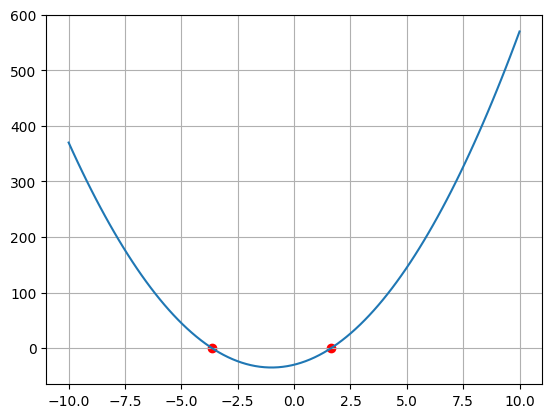

In [2]:
import matplotlib.pyplot as plt
import numpy as np

if isinstance(roots, tuple):
    # x1, x2 = roots
    points = x1, x2
    y0 = 0, 0
    plt.scatter(points, y0, color='red')
else:
    x = roots
    points = x
    y0 = 0
    plt.scatter(points, y0, color='red')
 
 
freq = 100  # частота дискретизации типо
a, b = -10, 10  # здесь ручками выставляем пределы по оси икс
 
# квадратичная функция
xi = np.linspace(a, b, freq)
y = [k1 * t * t + k2 * t + k3 for t in xi]
plt.plot(xi, y)
 
 
plt.grid()
plt.show()